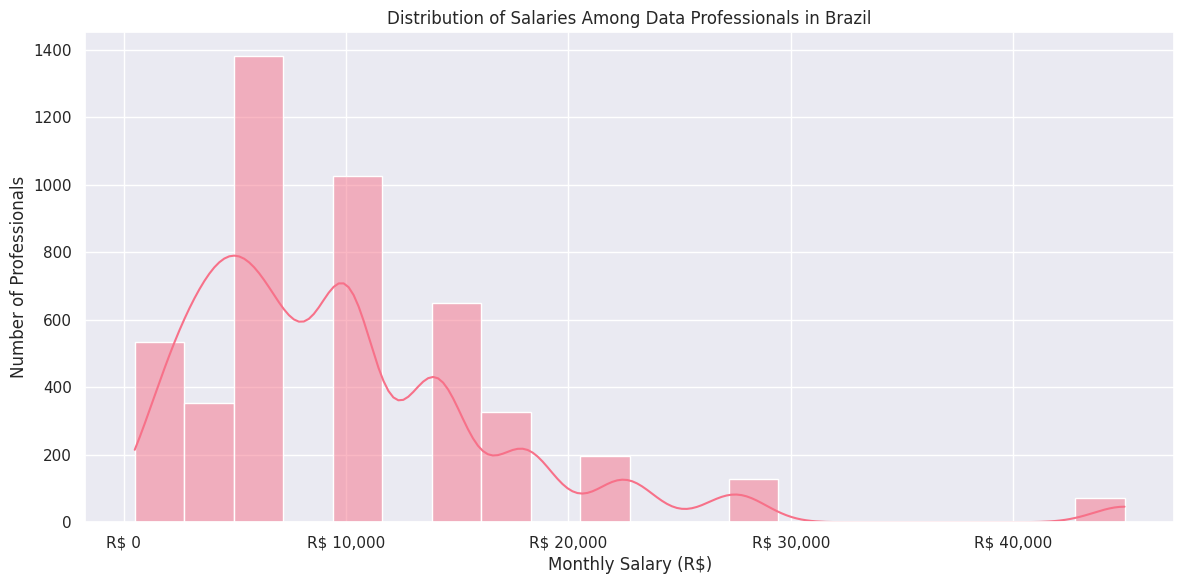

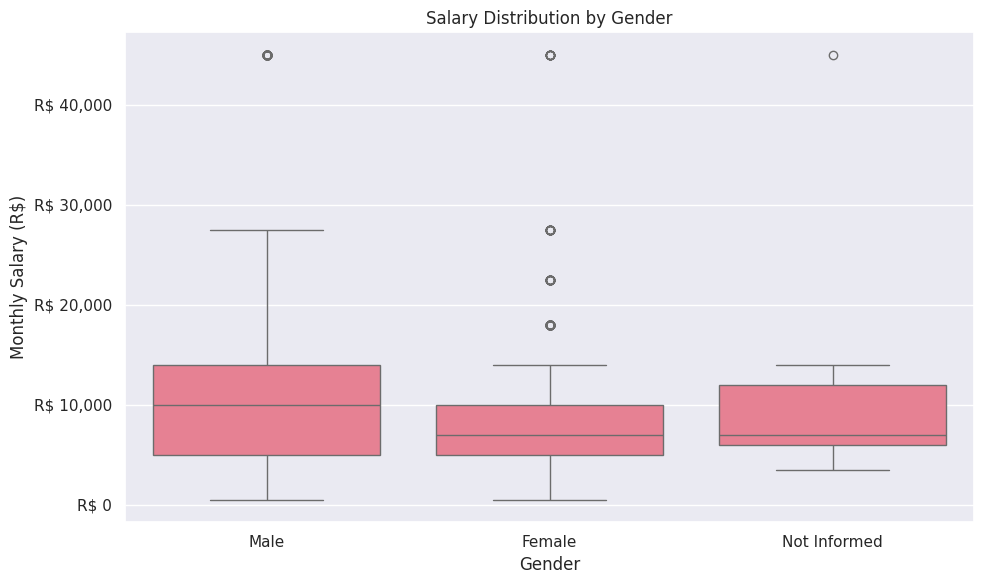

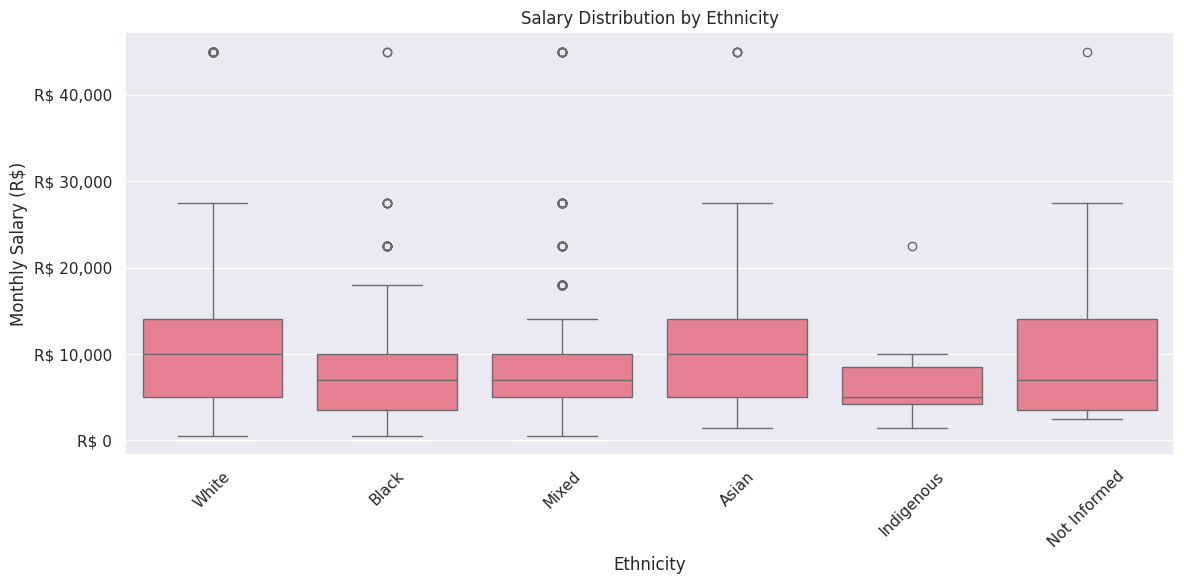

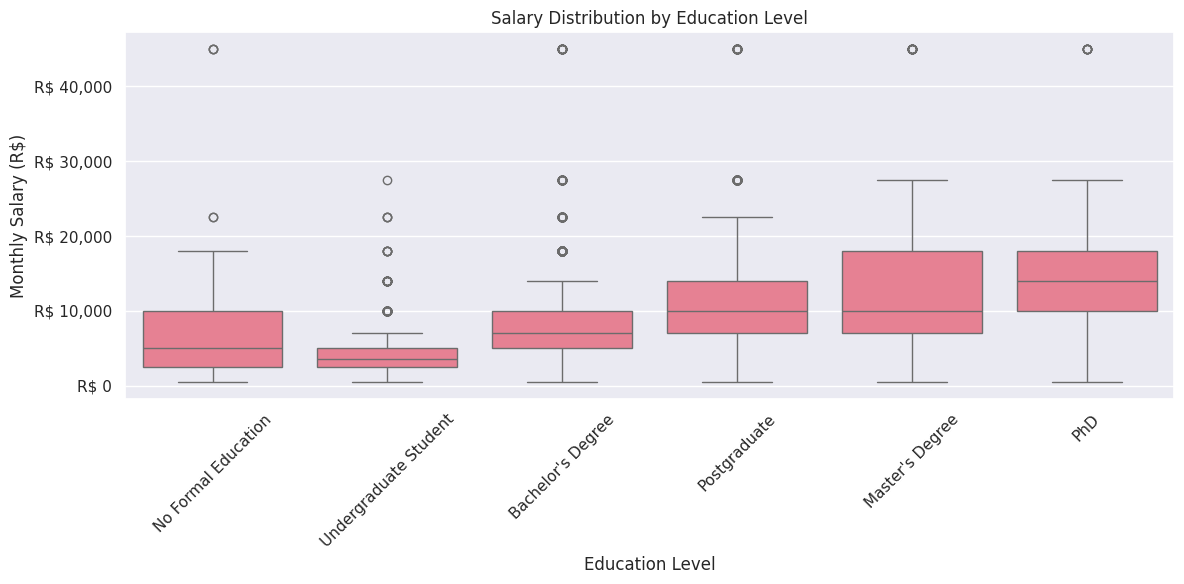

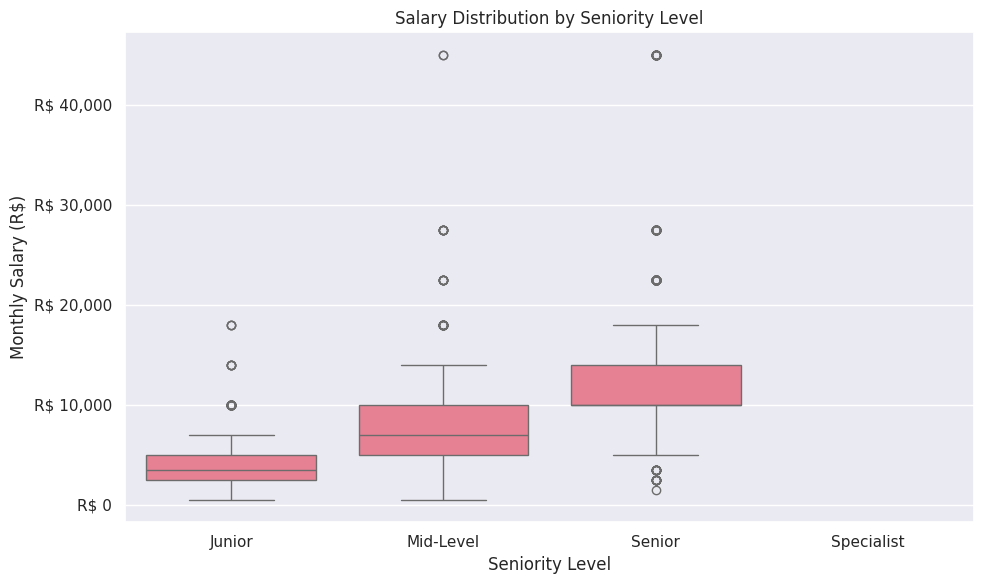

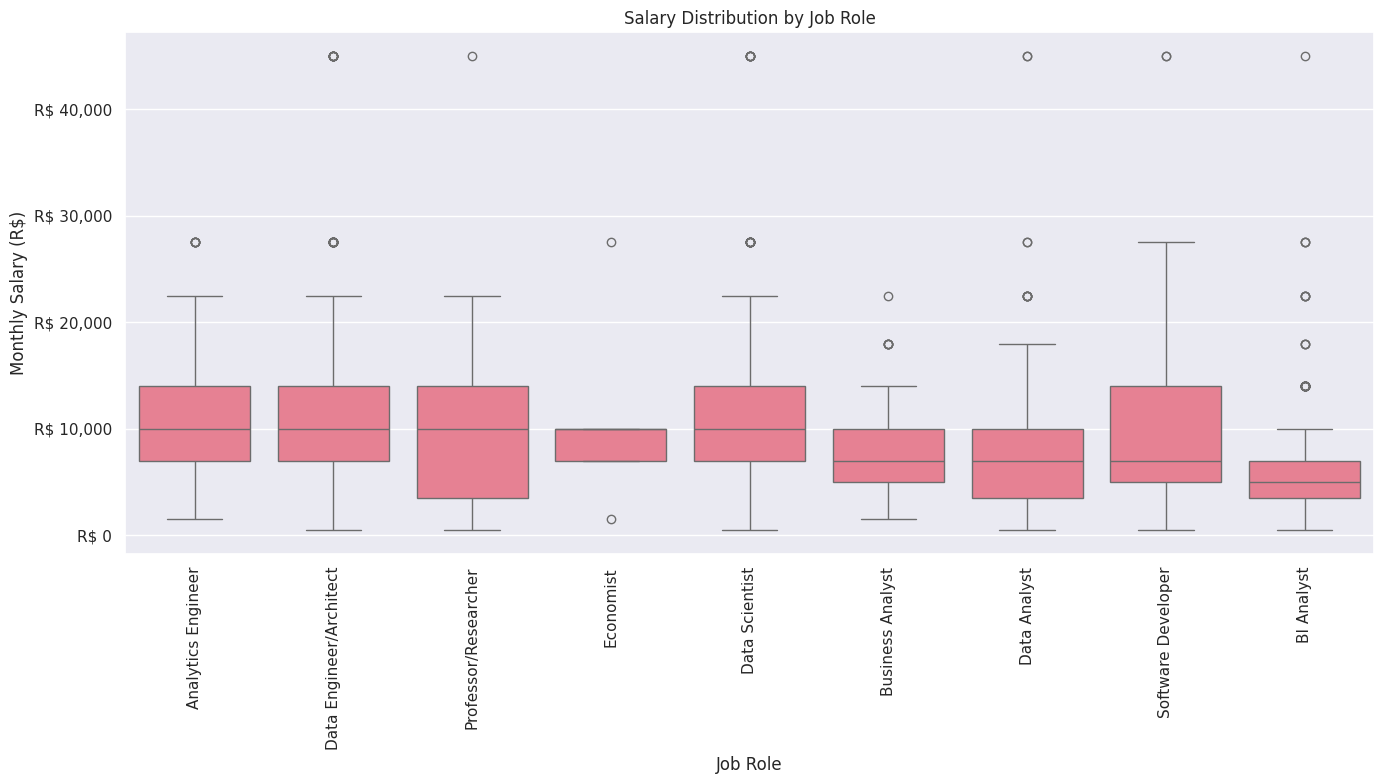

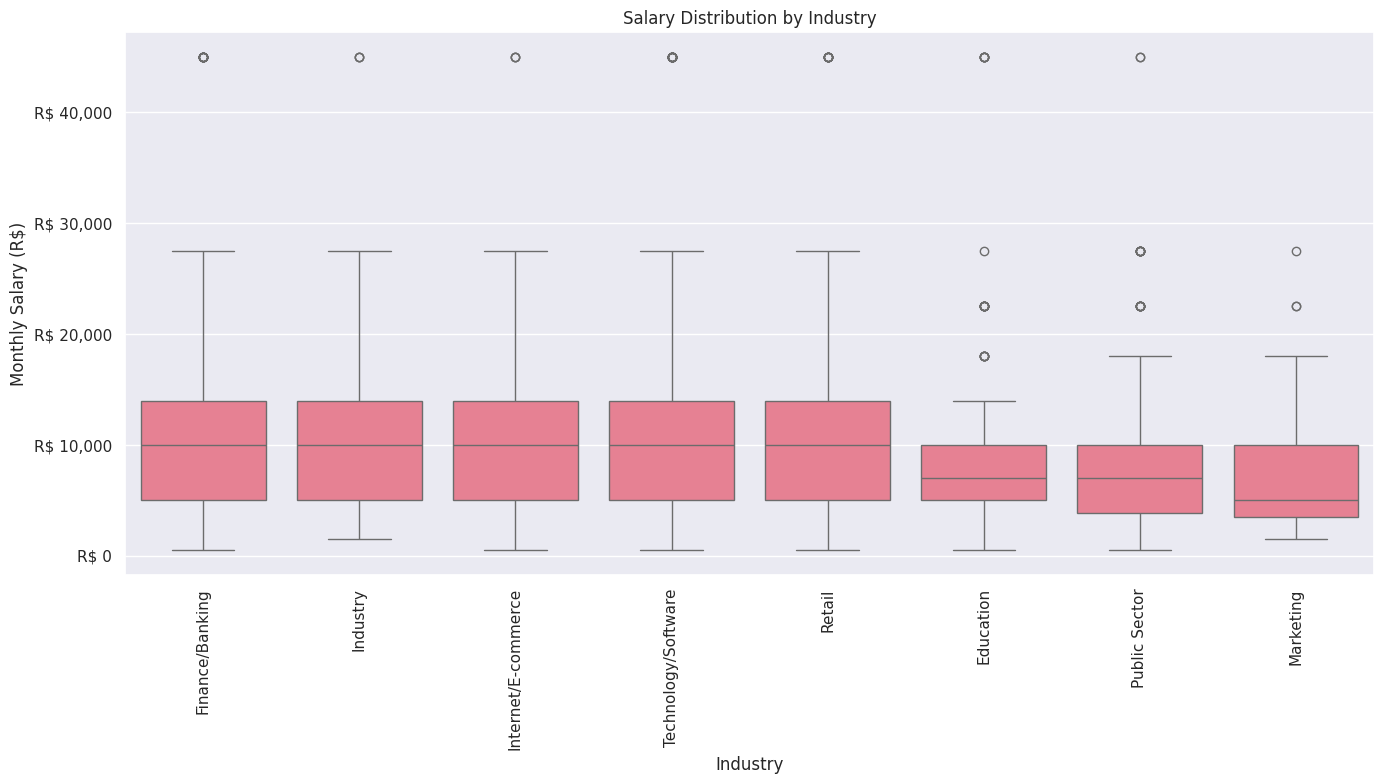

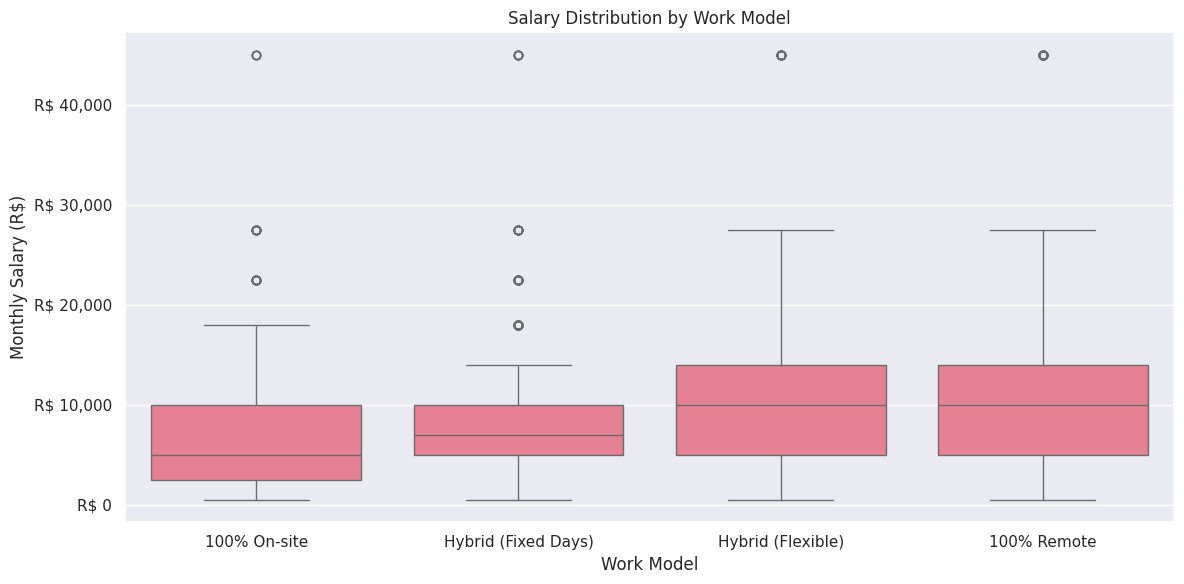

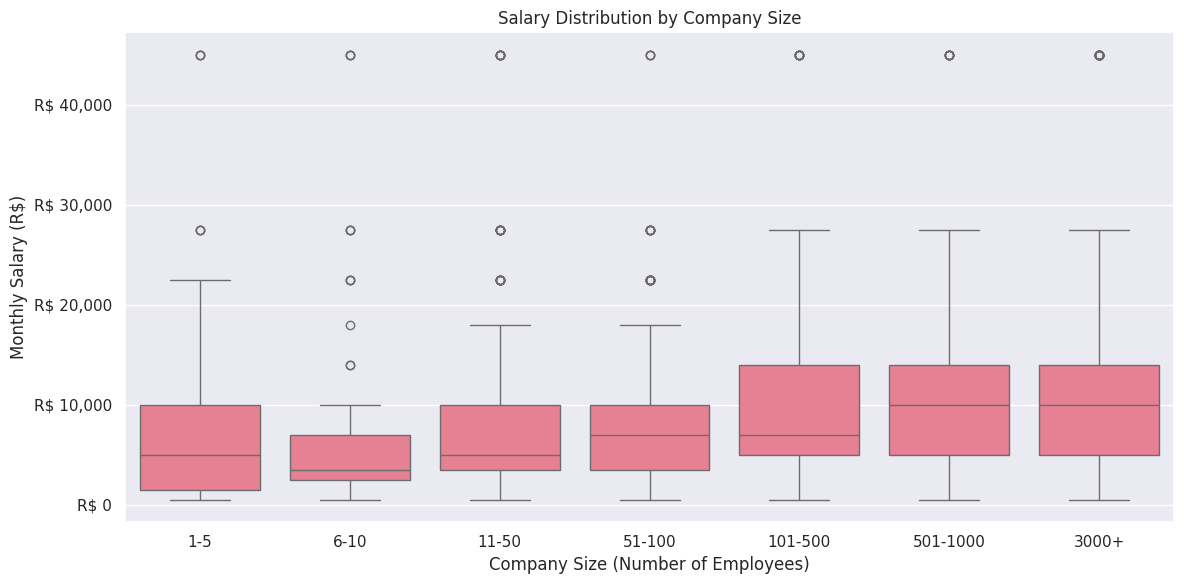

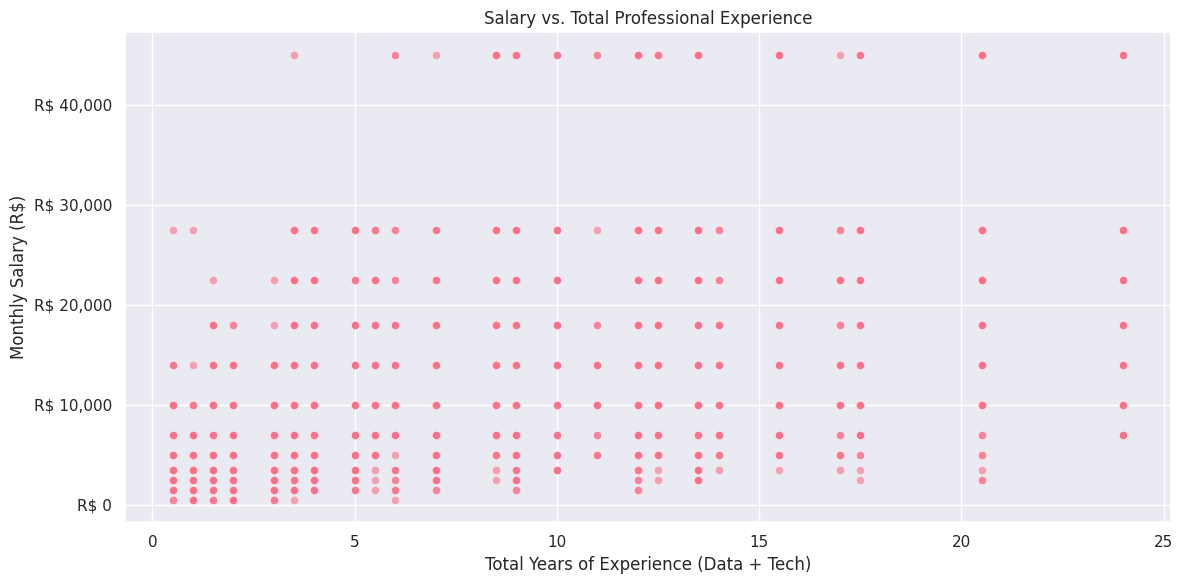

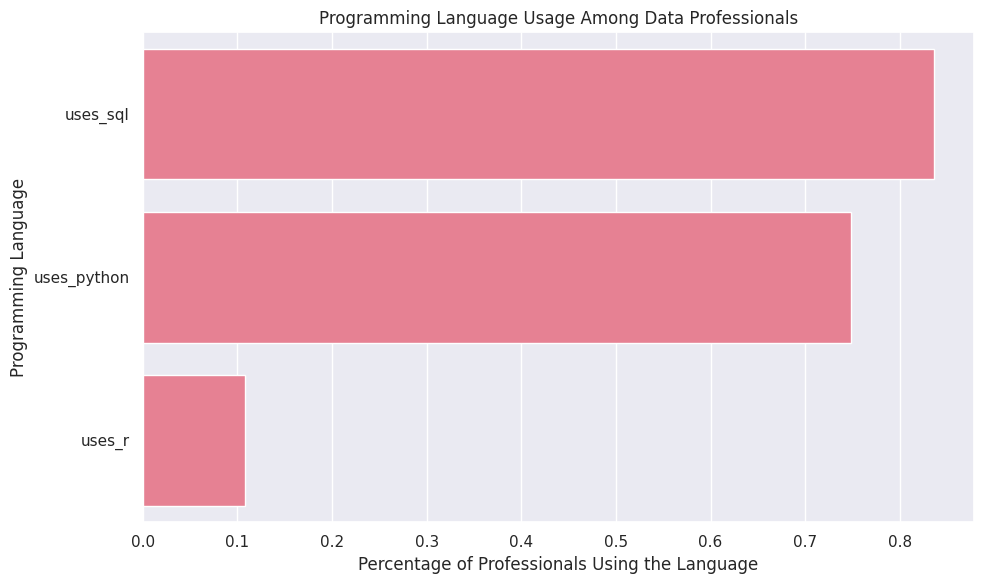

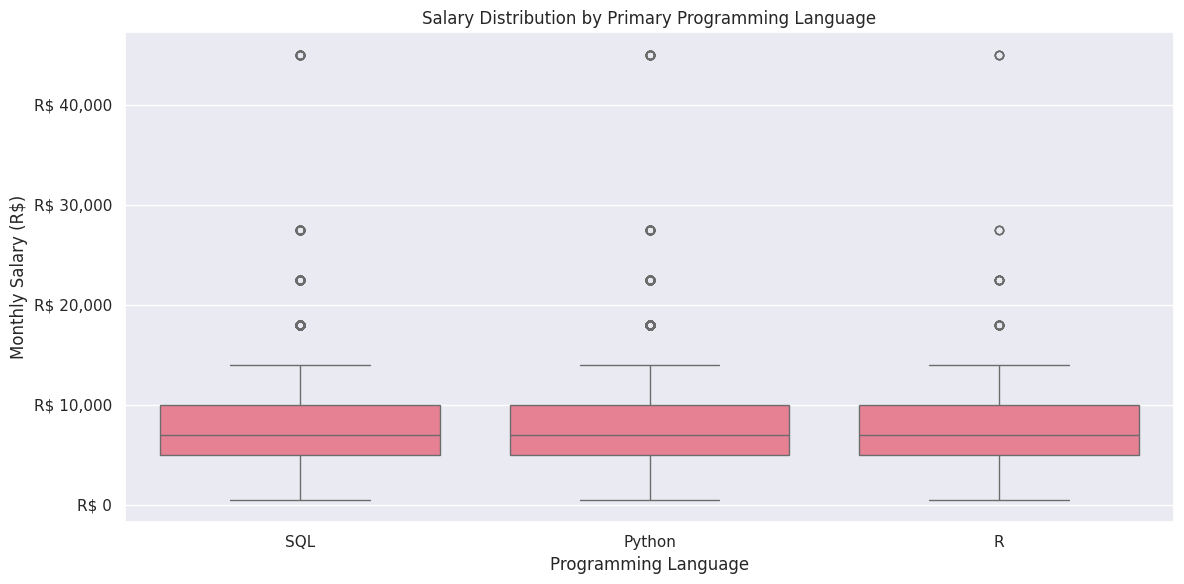

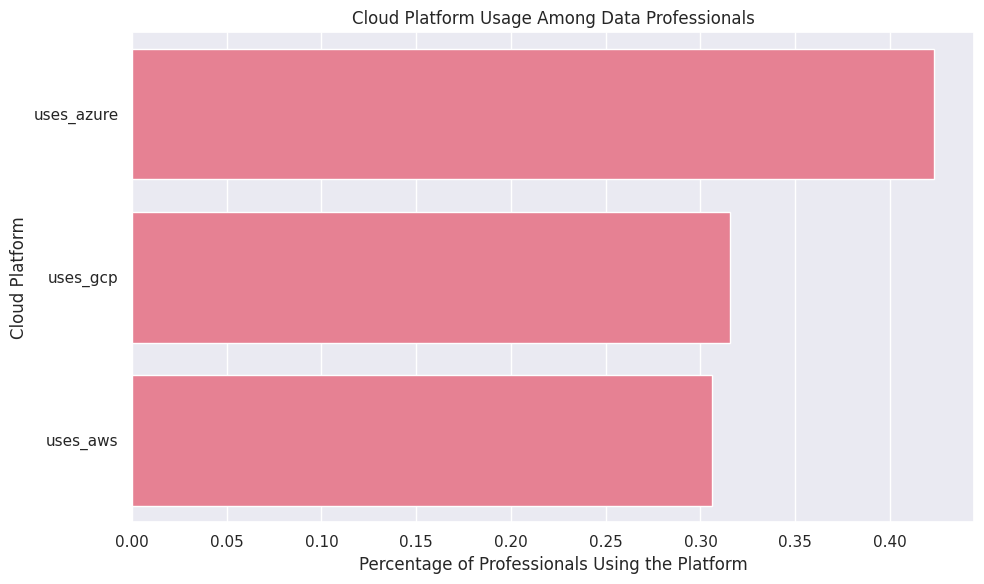

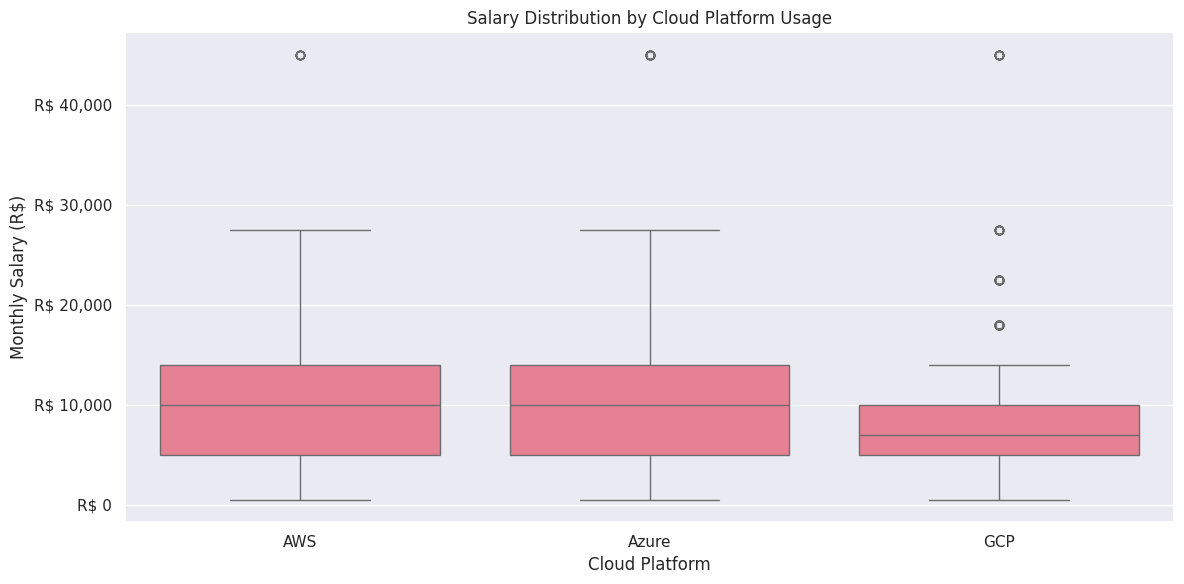

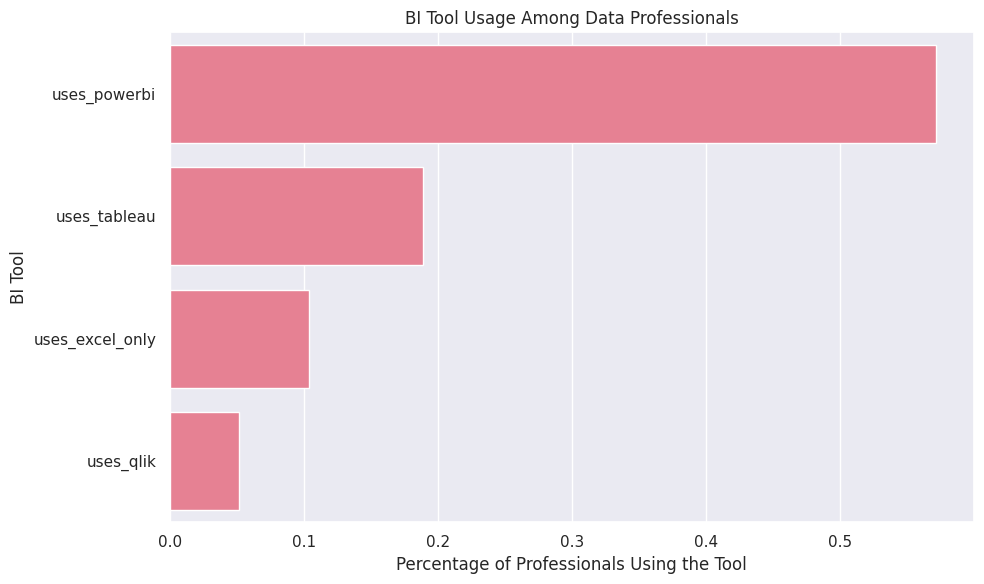

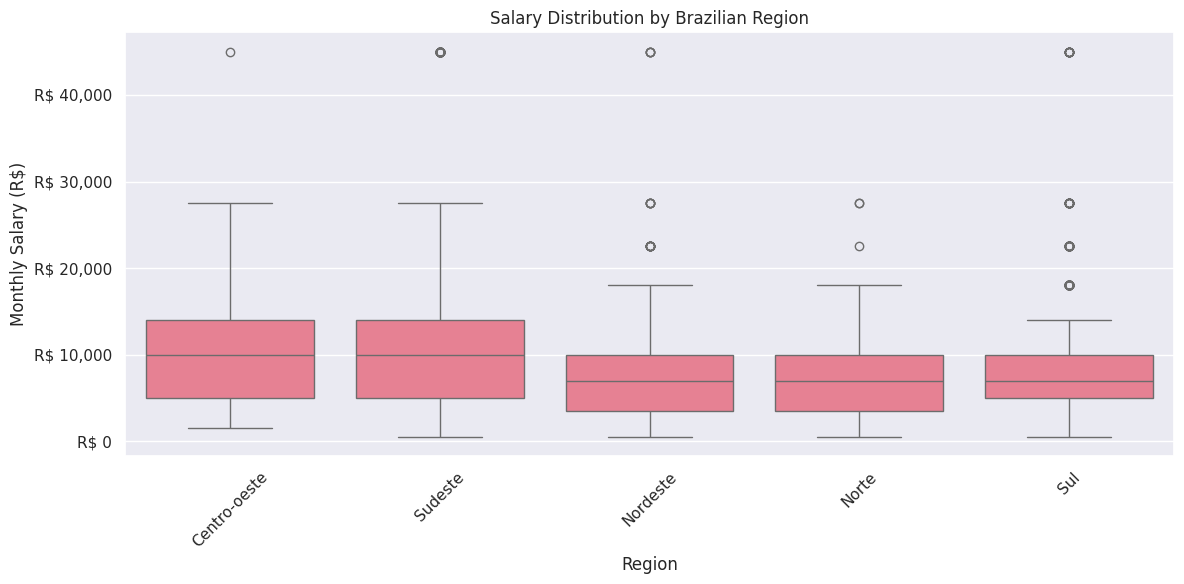

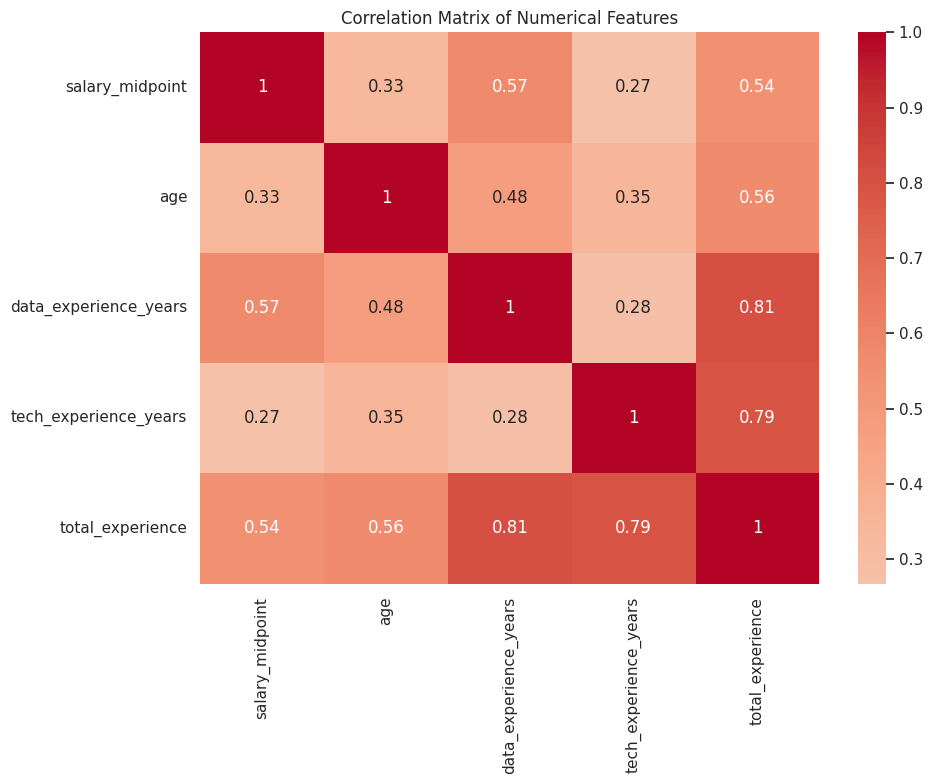

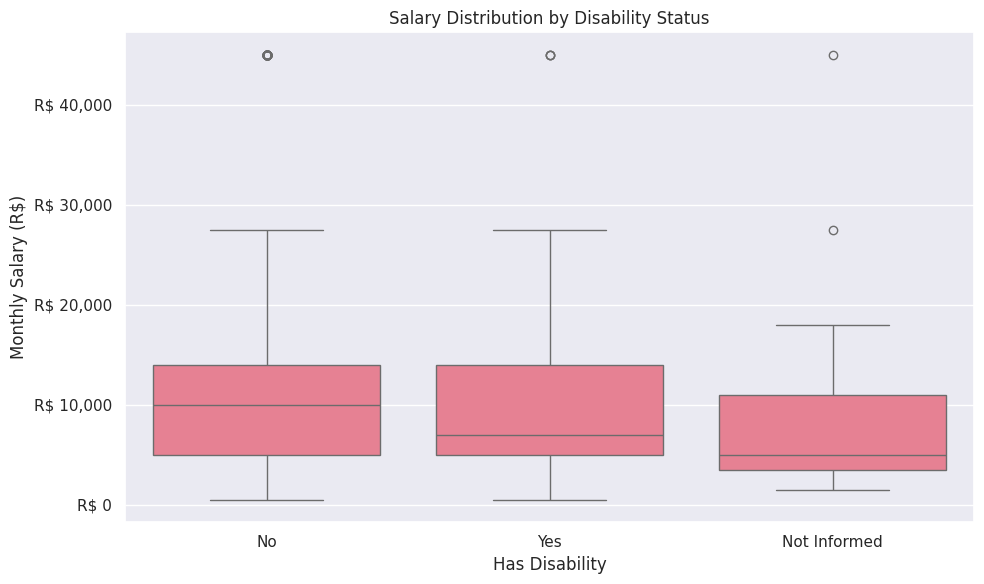

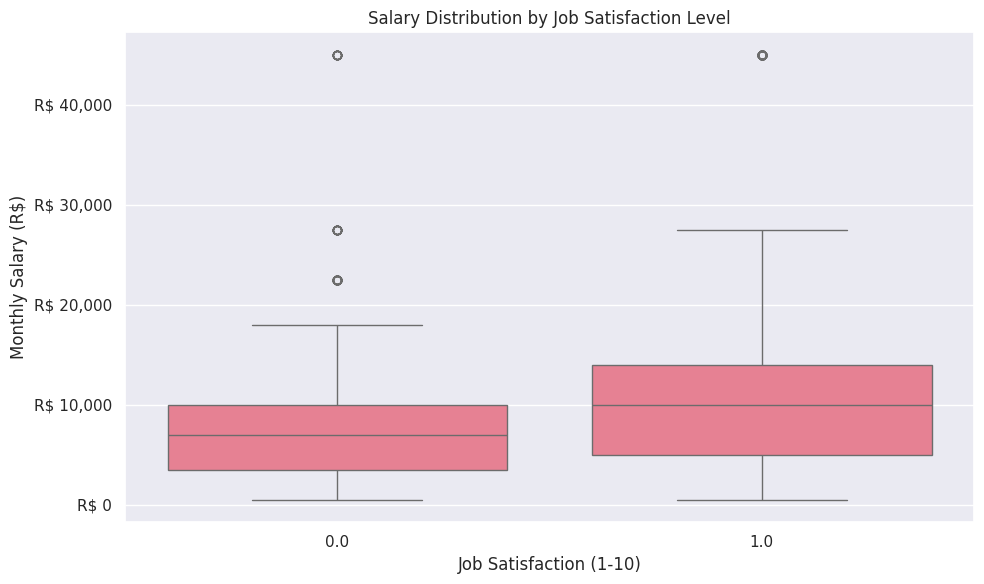

<ipython-input-24-b19eaf58f21b>:465: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


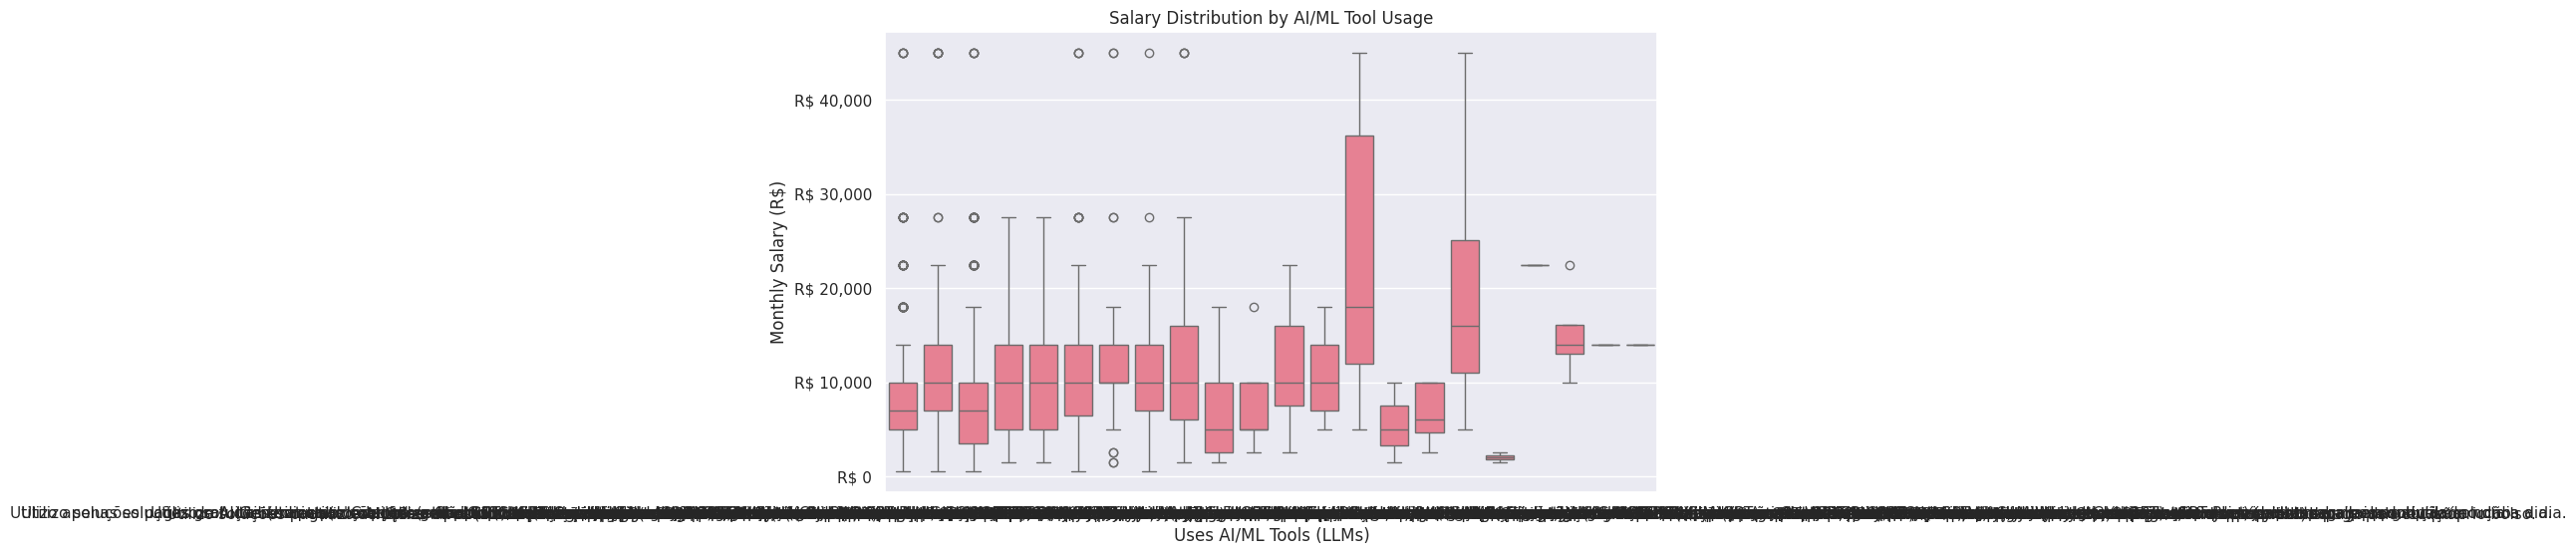


Median Salaries by Gender:
gender
Female           R$ 7,000.00
Male            R$ 10,000.00
Not Informed     R$ 7,000.00
Name: salary_midpoint, dtype: object

Median Salaries by Ethnicity:
ethnicity
Asian           R$ 10,000.00
Black            R$ 7,000.00
Indigenous       R$ 5,000.00
Mixed            R$ 7,000.00
Not Informed     R$ 7,000.00
White           R$ 10,000.00
Name: salary_midpoint, dtype: object

Median Salaries by Education Level:
education_level
Bachelor's Degree         R$ 7,000.00
Master's Degree          R$ 10,000.00
No Formal Education       R$ 5,000.00
PhD                      R$ 14,000.00
Postgraduate             R$ 10,000.00
Undergraduate Student     R$ 3,500.00
Name: salary_midpoint, dtype: object

Median Salaries by Seniority:
seniority
Junior        R$ 3,500.00
Mid-Level     R$ 7,000.00
Senior       R$ 10,000.00
Name: salary_midpoint, dtype: object

Median Salaries by Job Role:
current_role
Analytics Engineer         R$ 10,000.00
Data Engineer/Architect    R$ 10

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Set up visualization style using seaborn.set_theme()
# This will modify the default Matplotlib style
sns.set_theme(style="darkgrid") # Using 'darkgrid' as an example

# Other options: 'whitegrid', 'dark', 'white', 'ticks'
# Or use: sns.set() for the default Seaborn theme

# Set color palette
sns.set_palette("husl")

# Set up visualization style
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

# Define currency formatter for plots
def reais_formatter(x, pos):
    return f'R$ {x:,.0f}'

reais_format = FuncFormatter(reais_formatter)

# Load the dataset
df = pd.read_csv('State_of_data_BR_2023_Kaggle - df_survey_2023.csv')

# Data Cleaning and Preparation

# Rename columns for easier access (simplifying the complex column names)
column_mapping = {
    "('P1_a ', 'Idade')": 'age',
    "('P1_a_1 ', 'Faixa idade')": 'age_range',
    "('P1_b ', 'Genero')": 'gender',
    "('P1_c ', 'Cor/raca/etnia')": 'ethnicity',
    "('P1_d ', 'PCD')": 'disability',
    "('P1_l ', 'Nivel de Ensino')": 'education_level',
    "('P1_m ', 'Área de Formação')": 'education_field',
    "('P2_a ', 'Qual sua situação atual de trabalho?')": 'employment_status',
    "('P2_b ', 'Setor')": 'industry',
    "('P2_c ', 'Numero de Funcionarios')": 'company_size',
    "('P2_d ', 'Gestor?')": 'is_manager',
    "('P2_f ', 'Cargo Atual')": 'current_role',
    "('P2_g ', 'Nivel')": 'seniority',
    "('P2_h ', 'Faixa salarial')": 'salary_range',
    "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')": 'data_experience',
    "('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')": 'tech_experience',
    "('P2_k ', 'Você está satisfeito na sua empresa atual?')": 'job_satisfaction',
    "('P2_r ', 'Atualmente qual a sua forma de trabalho?')": 'work_model',
    "('P2_s ', 'Qual a forma de trabalho ideal para você?')": 'ideal_work_model',
    "('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')": 'data_team_size',
    "('P4_d_1 ', 'SQL')": 'uses_sql',
    "('P4_d_2 ', 'R ')": 'uses_r',
    "('P4_d_3 ', 'Python')": 'uses_python',
    "('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')": 'primary_language',
    "('P4_f ', 'Entre as linguagens listadas abaixo, qual é a sua preferida?')": 'preferred_language',
    "('P4_h_1 ', 'Azure (Microsoft)')": 'uses_azure',
    "('P4_h_2 ', 'Amazon Web Services (AWS)')": 'uses_aws',
    "('P4_h_3 ', 'Google Cloud (GCP)')": 'uses_gcp',
    "('P4_i ', 'Cloud preferida')": 'preferred_cloud',
    "('P4_j_1 ', 'Microsoft PowerBI')": 'uses_powerbi',
    "('P4_j_2 ', 'Qlik View/Qlik Sense')": 'uses_qlik',
    "('P4_j_3 ', 'Tableau')": 'uses_tableau',
    "('P4_j_22 ', 'Fazemos todas as análises utilizando apenas Excel ou planilhas do google')": 'uses_excel_only',
    "('P4_k ', 'Qual sua ferramenta de BI preferida?')": 'preferred_bi_tool',
    "('P4_m ', 'Utiliza ChatGPT ou LLMs no trabalho?')": 'uses_llms',
    "('P1_i_2 ', 'Regiao onde mora')": 'region'
}

# Apply column renaming
df = df.rename(columns=column_mapping)

# Clean and transform salary data
salary_mapping = {
    'de R$ 1.001/mês a R$ 2.000/mês': 1500,
    'de R$ 2.001/mês a R$ 3.000/mês': 2500,
    'de R$ 3.001/mês a R$ 4.000/mês': 3500,
    'de R$ 4.001/mês a R$ 6.000/mês': 5000,
    'de R$ 6.001/mês a R$ 8.000/mês': 7000,
    'de R$ 8.001/mês a R$ 12.000/mês': 10000,
    'de R$ 12.001/mês a R$ 16.000/mês': 14000,
    'de R$ 16.001/mês a R$ 20.000/mês': 18000,
    'de R$ 20.001/mês a R$ 25.000/mês': 22500,
    'de R$ 25.001/mês a R$ 30.000/mês': 27500,
    'Acima de R$ 40.001/mês': 45000,
    'Menos de R$ 1.000/mês': 500
}

df['salary_midpoint'] = df['salary_range'].map(salary_mapping)

# Clean and transform experience data
experience_mapping = {
    'Menos de 1 ano': 0.5,
    'de 1 a 2 anos': 1.5,
    'de 2 a 3 anos': 2.5,
    'de 3 a 4 anos': 3.5,
    'de 4 a 5 anos': 4.5,
    'de 5 a 6 anos': 5.5,
    'de 6 a 7 anos': 6.5,
    'de 7 a 10 anos': 8.5,
    'Mais de 10 anos': 12
}

df['data_experience_years'] = df['data_experience'].map(experience_mapping)
df['tech_experience_years'] = df['tech_experience'].map(experience_mapping)

# Fill NA values for tech experience
df['tech_experience_years'] = df['tech_experience_years'].fillna(0)
df['total_experience'] = df['data_experience_years'] + df['tech_experience_years']

# Clean education level
education_mapping = {
    'Estudante de Graduação': 'Undergraduate Student',
    'Graduação/Bacharelado': "Bachelor's Degree",
    'Pós-graduação': 'Postgraduate',
    'Mestrado': "Master's Degree",
    'Doutorado ou Phd': 'PhD',
    'Não tenho graduação formal': 'No Formal Education'
}

df['education_level'] = df['education_level'].map(education_mapping)

# Clean gender data
gender_mapping = {
    'Masculino': 'Male',
    'Feminino': 'Female',
    'Prefiro não informar': 'Not Informed'
}

df['gender'] = df['gender'].map(gender_mapping)

# Clean ethnicity data
ethnicity_mapping = {
    'Branca': 'White',
    'Preta': 'Black',
    'Parda': 'Mixed',
    'Amarela': 'Asian',
    'Indígena': 'Indigenous',
    'Prefiro não informar': 'Not Informed'
}

df['ethnicity'] = df['ethnicity'].map(ethnicity_mapping)

# Clean disability data
disability_mapping = {
    'Não': 'No',
    'Sim': 'Yes',
    'Prefiro não informar': 'Not Informed'
}

df['disability'] = df['disability'].map(disability_mapping)

# Clean seniority data
seniority_mapping = {
    'Júnior': 'Junior',
    'Pleno': 'Mid-Level',
    'Sênior': 'Senior',
    'Especialista': 'Specialist'
}

df['seniority'] = df['seniority'].map(seniority_mapping)

# Clean work model data
work_model_mapping = {
    'Modelo 100% presencial': '100% On-site',
    'Modelo híbrido com dias fixos de trabalho presencial': 'Hybrid (Fixed Days)',
    'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)': 'Hybrid (Flexible)',
    'Modelo 100% remoto': '100% Remote'
}

df['work_model'] = df['work_model'].map(work_model_mapping)
df['ideal_work_model'] = df['ideal_work_model'].map(work_model_mapping)

# Clean company size data
company_size_mapping = {
    'de 1 a 5': '1-5',
    'de 6 a 10': '6-10',
    'de 11 a 50': '11-50',
    'de 51 a 100': '51-100',
    'de 101 a 500': '101-500',
    'de 501 a 1.000': '501-1000',
    'Acima de 3.000': '3000+'
}

df['company_size'] = df['company_size'].map(company_size_mapping)

# Clean industry data
industry_mapping = {
    'Tecnologia/Fábrica de Software': 'Technology/Software',
    'Finanças ou Bancos': 'Finance/Banking',
    'Internet/Ecommerce': 'Internet/E-commerce',
    'Setor Público': 'Public Sector',
    'Indústria': 'Industry',
    'Varejo': 'Retail',
    'Educação': 'Education',
    'Saúde': 'Healthcare',
    'Marketing': 'Marketing',
    'Consultoria': 'Consulting',
    'Entretenimento': 'Entertainment'
}

df['industry'] = df['industry'].map(industry_mapping)

# Clean current role data
role_mapping = {
    'Analista de Dados/Data Analyst': 'Data Analyst',
    'Cientista de Dados/Data Scientist': 'Data Scientist',
    'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect': 'Data Engineer/Architect',
    'Analista de BI/BI Analyst': 'BI Analyst',
    'Analista de Business Intelligence/BI': 'BI Analyst',
    'Analista de Negócios/Business Analyst': 'Business Analyst',
    'Analytics Engineer': 'Analytics Engineer',
    'Machine Learning Engineer/AI Engineer': 'ML/AI Engineer',
    'Database Administrator/DBA': 'DBA',
    'Data Product Manager/DPM': 'Data Product Manager',
    'Business Analyst': 'Business Analyst',
    'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas': 'Software Developer',
    'Professor/Pesquisador': 'Professor/Researcher',
    'Economista': 'Economist'
}

df['current_role'] = df['current_role'].map(role_mapping)

# Data Analysis and Visualization

# 1. Salary Distribution Overview
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='salary_midpoint', bins=20, kde=True)
plt.title('Distribution of Salaries Among Data Professionals in Brazil')
plt.xlabel('Monthly Salary (R$)')
plt.ylabel('Number of Professionals')
plt.gca().xaxis.set_major_formatter(reais_format)
plt.tight_layout()
plt.show()

# 2. Salary by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='gender', y='salary_midpoint', order=['Male', 'Female', 'Not Informed'])
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Monthly Salary (R$)')
plt.gca().yaxis.set_major_formatter(reais_format)
plt.tight_layout()
plt.show()

# 3. Salary by Ethnicity
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='ethnicity', y='salary_midpoint',
            order=['White', 'Black', 'Mixed', 'Asian', 'Indigenous', 'Not Informed'])
plt.title('Salary Distribution by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Monthly Salary (R$)')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(reais_format)
plt.tight_layout()
plt.show()

# 4. Salary by Education Level
plt.figure(figsize=(12, 6))
order = ['No Formal Education', 'Undergraduate Student', "Bachelor's Degree",
         'Postgraduate', "Master's Degree", 'PhD']
sns.boxplot(data=df, x='education_level', y='salary_midpoint', order=order)
plt.title('Salary Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Monthly Salary (R$)')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(reais_format)
plt.tight_layout()
plt.show()

# 5. Salary by Seniority Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='seniority', y='salary_midpoint',
            order=['Junior', 'Mid-Level', 'Senior', 'Specialist'])
plt.title('Salary Distribution by Seniority Level')
plt.xlabel('Seniority Level')
plt.ylabel('Monthly Salary (R$)')
plt.gca().yaxis.set_major_formatter(reais_format)
plt.tight_layout()
plt.show()

# 6. Salary by Job Role
plt.figure(figsize=(14, 8))
role_order = df.groupby('current_role')['salary_midpoint'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='current_role', y='salary_midpoint', order=role_order)
plt.title('Salary Distribution by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Monthly Salary (R$)')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(reais_format)
plt.tight_layout()
plt.show()

# 7. Salary by Industry
plt.figure(figsize=(14, 8))
industry_order = df.groupby('industry')['salary_midpoint'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='industry', y='salary_midpoint', order=industry_order)
plt.title('Salary Distribution by Industry')
plt.xlabel('Industry')
plt.ylabel('Monthly Salary (R$)')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(reais_format)
plt.tight_layout()
plt.show()

# 8. Salary by Work Model
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='work_model', y='salary_midpoint',
            order=['100% On-site', 'Hybrid (Fixed Days)', 'Hybrid (Flexible)', '100% Remote'])
plt.title('Salary Distribution by Work Model')
plt.xlabel('Work Model')
plt.ylabel('Monthly Salary (R$)')
plt.gca().yaxis.set_major_formatter(reais_format)
plt.tight_layout()
plt.show()

# 9. Salary by Company Size
plt.figure(figsize=(12, 6))
size_order = ['1-5', '6-10', '11-50', '51-100', '101-500', '501-1000', '3000+']
sns.boxplot(data=df, x='company_size', y='salary_midpoint', order=size_order)
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size (Number of Employees)')
plt.ylabel('Monthly Salary (R$)')
plt.gca().yaxis.set_major_formatter(reais_format)
plt.tight_layout()
plt.show()

# 10. Salary vs. Experience
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='total_experience', y='salary_midpoint', alpha=0.6)
plt.title('Salary vs. Total Professional Experience')
plt.xlabel('Total Years of Experience (Data + Tech)')
plt.ylabel('Monthly Salary (R$)')
plt.gca().yaxis.set_major_formatter(reais_format)
plt.tight_layout()
plt.show()

# 11. Programming Language Usage by Salary
languages = ['uses_sql', 'uses_python', 'uses_r']
language_usage = df[languages].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=language_usage.values, y=language_usage.index)
plt.title('Programming Language Usage Among Data Professionals')
plt.xlabel('Percentage of Professionals Using the Language')
plt.ylabel('Programming Language')
plt.tight_layout()
plt.show()

# 12. Salary by Programming Language
plt.figure(figsize=(12, 6))
melted = df.melt(id_vars=['salary_midpoint'], value_vars=languages,
                 var_name='language', value_name='uses_language')
melted['language'] = melted['language'].replace({
    'uses_sql': 'SQL',
    'uses_python': 'Python',
    'uses_r': 'R'
})
sns.boxplot(data=melted[melted['uses_language'] == 1],
            x='language', y='salary_midpoint')
plt.title('Salary Distribution by Primary Programming Language')
plt.xlabel('Programming Language')
plt.ylabel('Monthly Salary (R$)')
plt.gca().yaxis.set_major_formatter(reais_format)
plt.tight_layout()
plt.show()

# 13. Cloud Platform Usage by Salary
cloud_platforms = ['uses_aws', 'uses_azure', 'uses_gcp']
cloud_usage = df[cloud_platforms].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=cloud_usage.values, y=cloud_usage.index)
plt.title('Cloud Platform Usage Among Data Professionals')
plt.xlabel('Percentage of Professionals Using the Platform')
plt.ylabel('Cloud Platform')
plt.tight_layout()
plt.show()

# 14. Salary by Cloud Platform
plt.figure(figsize=(12, 6))
melted_cloud = df.melt(id_vars=['salary_midpoint'], value_vars=cloud_platforms,
                       var_name='cloud', value_name='uses_cloud')
melted_cloud['cloud'] = melted_cloud['cloud'].replace({
    'uses_aws': 'AWS',
    'uses_azure': 'Azure',
    'uses_gcp': 'GCP'
})
sns.boxplot(data=melted_cloud[melted_cloud['uses_cloud'] == 1],
            x='cloud', y='salary_midpoint')
plt.title('Salary Distribution by Cloud Platform Usage')
plt.xlabel('Cloud Platform')
plt.ylabel('Monthly Salary (R$)')
plt.gca().yaxis.set_major_formatter(reais_format)
plt.tight_layout()
plt.show()

# 15. BI Tool Usage by Salary
bi_tools = ['uses_powerbi', 'uses_qlik', 'uses_tableau', 'uses_excel_only']
bi_usage = df[bi_tools].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=bi_usage.values, y=bi_usage.index)
plt.title('BI Tool Usage Among Data Professionals')
plt.xlabel('Percentage of Professionals Using the Tool')
plt.ylabel('BI Tool')
plt.tight_layout()
plt.show()

# 16. Salary by Region
plt.figure(figsize=(12, 6))
region_order = df.groupby('region')['salary_midpoint'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='region', y='salary_midpoint', order=region_order)
plt.title('Salary Distribution by Brazilian Region')
plt.xlabel('Region')
plt.ylabel('Monthly Salary (R$)')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(reais_format)
plt.tight_layout()
plt.show()

# 17. Correlation Analysis
# Select numerical features for correlation analysis
numerical_features = ['salary_midpoint', 'age', 'data_experience_years',
                      'tech_experience_years', 'total_experience']

corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# 18. Salary by Disability Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='disability', y='salary_midpoint',
            order=['No', 'Yes', 'Not Informed'])
plt.title('Salary Distribution by Disability Status')
plt.xlabel('Has Disability')
plt.ylabel('Monthly Salary (R$)')
plt.gca().yaxis.set_major_formatter(reais_format)
plt.tight_layout()
plt.show()

# 19. Job Satisfaction by Salary
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='job_satisfaction', y='salary_midpoint')
plt.title('Salary Distribution by Job Satisfaction Level')
plt.xlabel('Job Satisfaction (1-10)')
plt.ylabel('Monthly Salary (R$)')
plt.gca().yaxis.set_major_formatter(reais_format)
plt.tight_layout()
plt.show()

# 20. AI/ML Tool Usage by Salary
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='uses_llms', y='salary_midpoint')
plt.title('Salary Distribution by AI/ML Tool Usage')
plt.xlabel('Uses AI/ML Tools (LLMs)')
plt.ylabel('Monthly Salary (R$)')
plt.gca().yaxis.set_major_formatter(reais_format)
plt.tight_layout()
plt.show()

# Statistical Analysis

# Calculate median salaries by different categories
print("\nMedian Salaries by Gender:")
print(df.groupby('gender')['salary_midpoint'].median().apply(lambda x: f"R$ {x:,.2f}"))

print("\nMedian Salaries by Ethnicity:")
print(df.groupby('ethnicity')['salary_midpoint'].median().apply(lambda x: f"R$ {x:,.2f}"))

print("\nMedian Salaries by Education Level:")
print(df.groupby('education_level')['salary_midpoint'].median().apply(lambda x: f"R$ {x:,.2f}"))

print("\nMedian Salaries by Seniority:")
print(df.groupby('seniority')['salary_midpoint'].median().apply(lambda x: f"R$ {x:,.2f}"))

print("\nMedian Salaries by Job Role:")
print(df.groupby('current_role')['salary_midpoint'].median().sort_values(ascending=False).apply(lambda x: f"R$ {x:,.2f}"))

print("\nMedian Salaries by Industry:")
print(df.groupby('industry')['salary_midpoint'].median().sort_values(ascending=False).apply(lambda x: f"R$ {x:,.2f}"))

print("\nMedian Salaries by Region:")
print(df.groupby('region')['salary_midpoint'].median().sort_values(ascending=False).apply(lambda x: f"R$ {x:,.2f}"))

# Calculate gender pay gap
male_median = df[df['gender'] == 'Male']['salary_midpoint'].median()
female_median = df[df['gender'] == 'Female']['salary_midpoint'].median()
gender_pay_gap = (male_median - female_median) / female_median * 100

print(f"\nGender Pay Gap: {gender_pay_gap:.2f}% (Male median: R$ {male_median:,.2f}, Female median: R$ {female_median:,.2f})")

# Calculate ethnicity pay gaps
white_median = df[df['ethnicity'] == 'White']['salary_midpoint'].median()
black_median = df[df['ethnicity'] == 'Black']['salary_midpoint'].median()
mixed_median = df[df['ethnicity'] == 'Mixed']['salary_midpoint'].median()

white_black_gap = (white_median - black_median) / black_median * 100
white_mixed_gap = (white_median - mixed_median) / mixed_median * 100

print(f"\nWhite-Black Pay Gap: {white_black_gap:.2f}% (White median: R$ {white_median:,.2f}, Black median: R$ {black_median:,.2f})")
print(f"White-Mixed Pay Gap: {white_mixed_gap:.2f}% (White median: R$ {white_median:,.2f}, Mixed median: R$ {mixed_median:,.2f})")

# Experience vs Salary correlation
exp_salary_corr = df['total_experience'].corr(df['salary_midpoint'])
print(f"\nCorrelation between Total Experience and Salary: {exp_salary_corr:.2f}")

# Education vs Salary correlation (ordinal encoding)
education_order = {
    'No Formal Education': 0,
    'Undergraduate Student': 1,
    "Bachelor's Degree": 2,
    'Postgraduate': 3,
    "Master's Degree": 4,
    'PhD': 5
}

df['education_encoded'] = df['education_level'].map(education_order)
edu_salary_corr = df['education_encoded'].corr(df['salary_midpoint'])
print(f"Correlation between Education Level and Salary: {edu_salary_corr:.2f}")

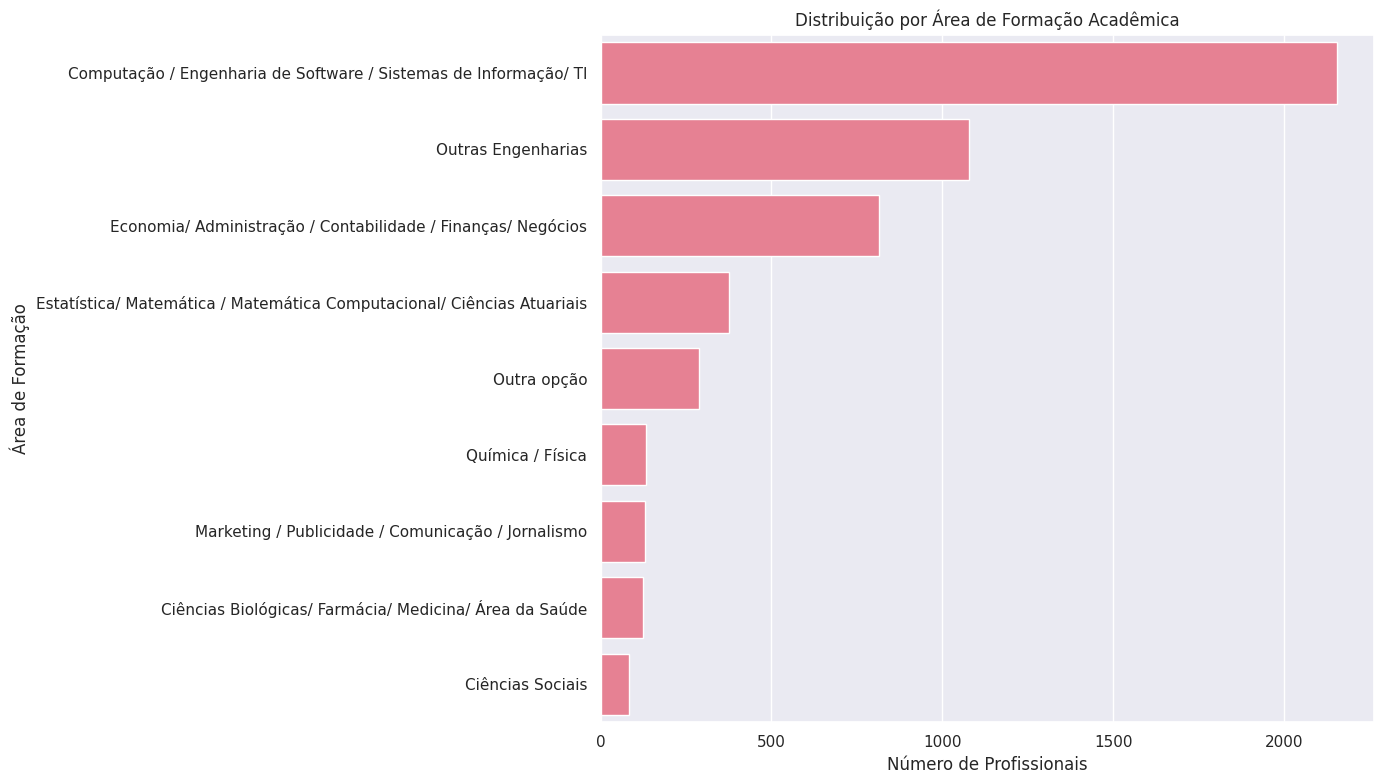

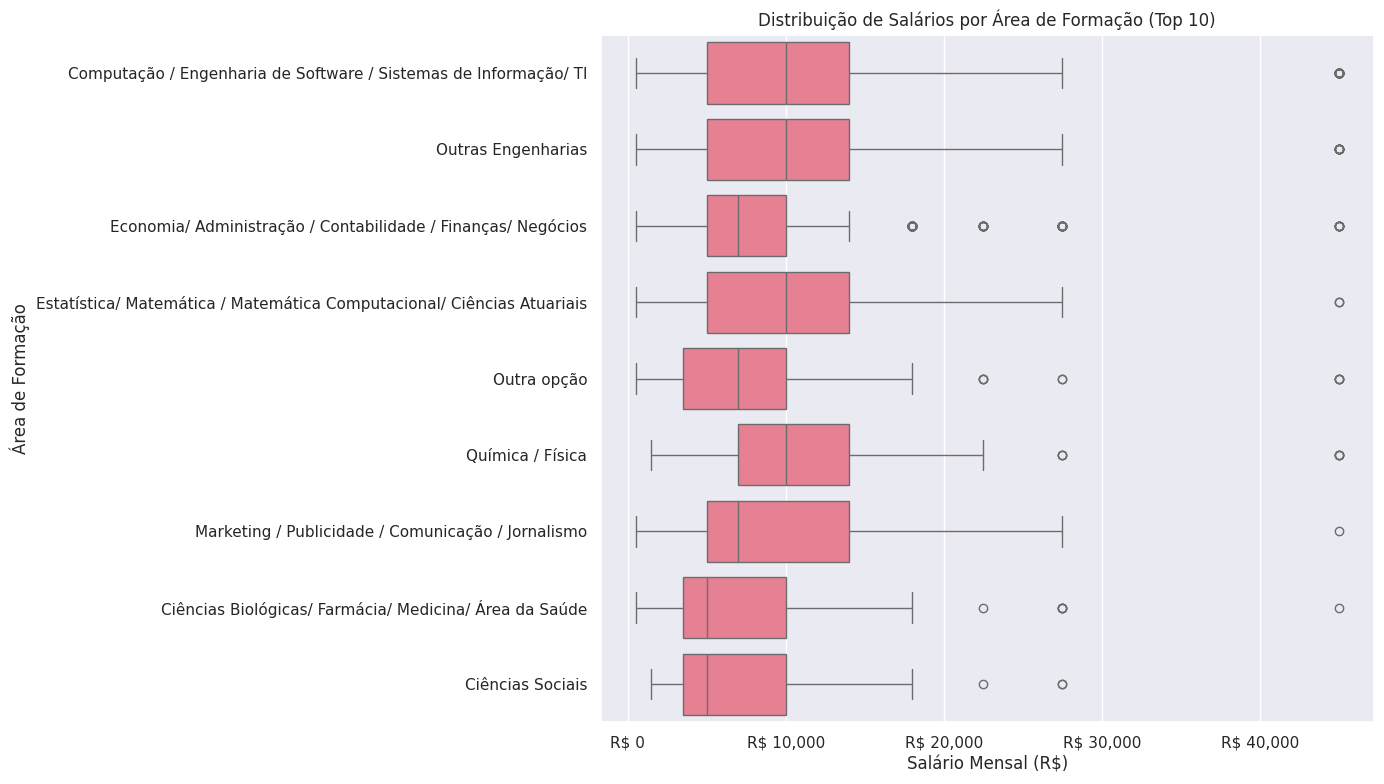

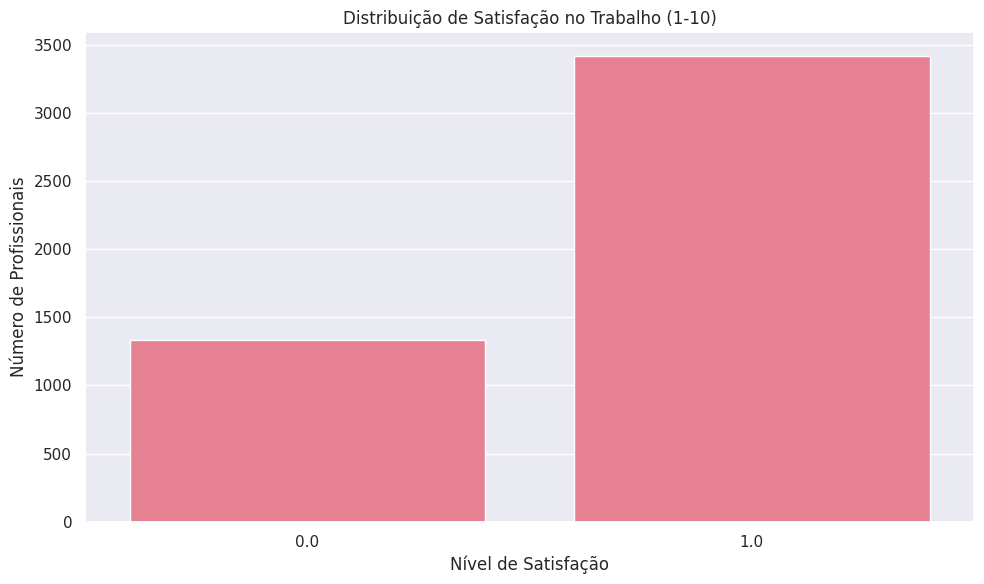

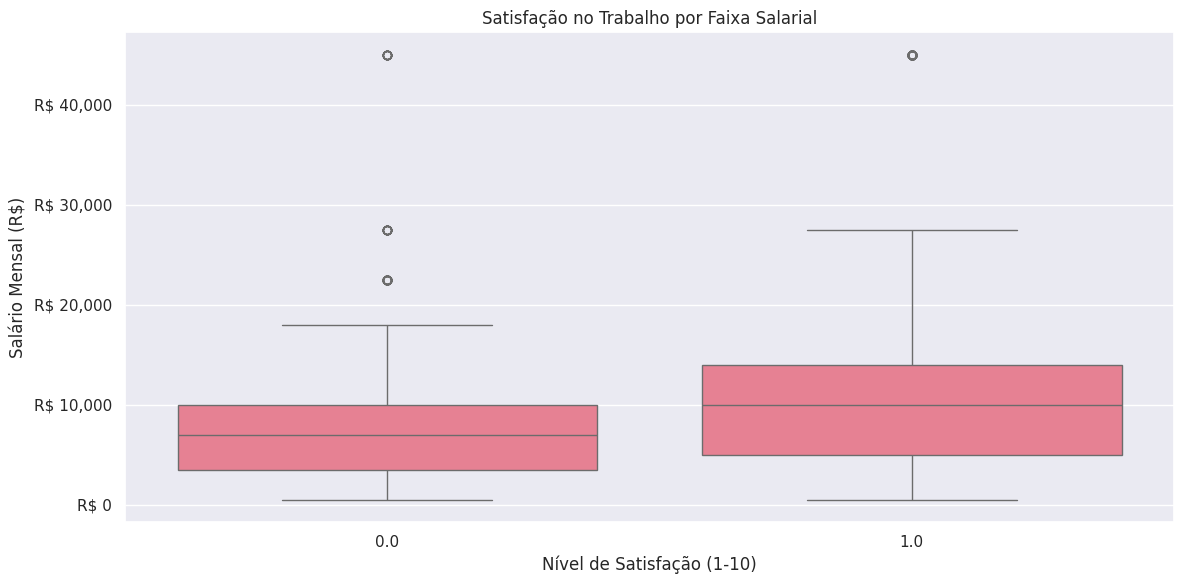

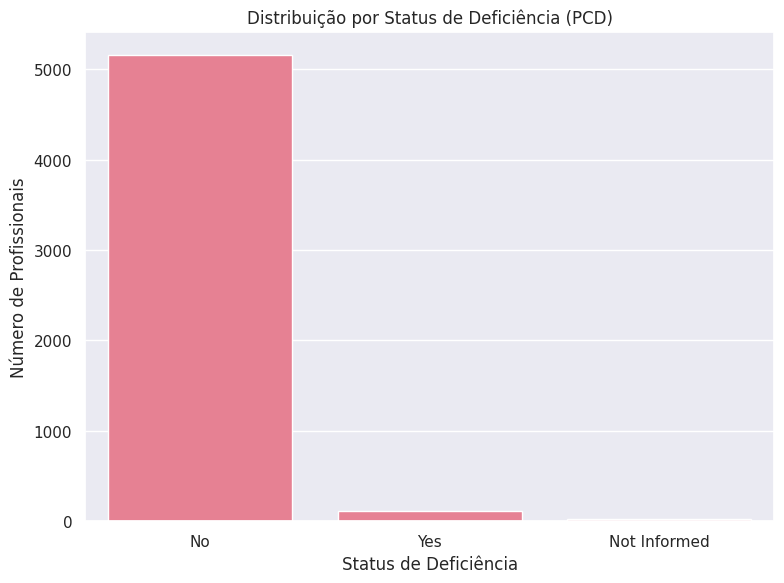

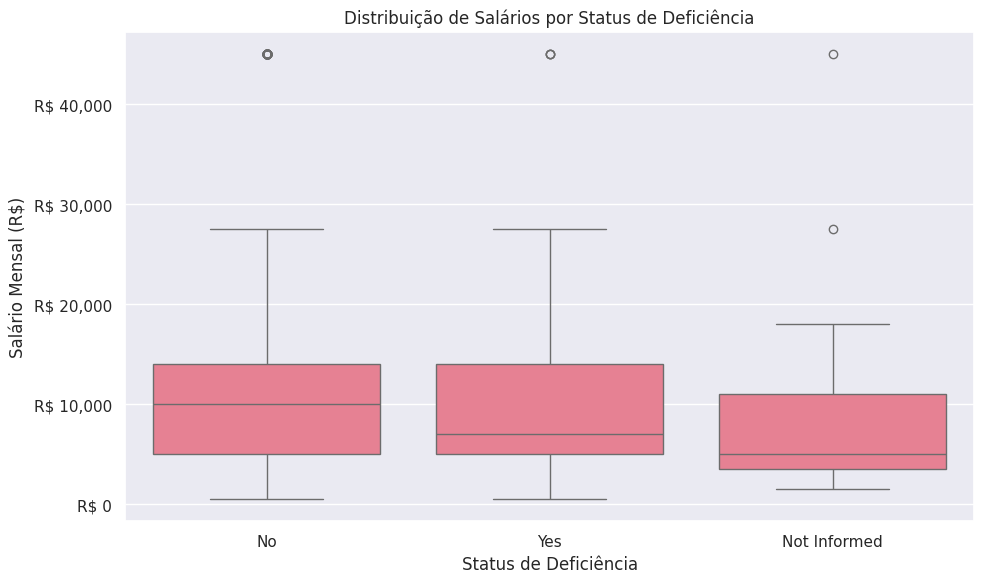

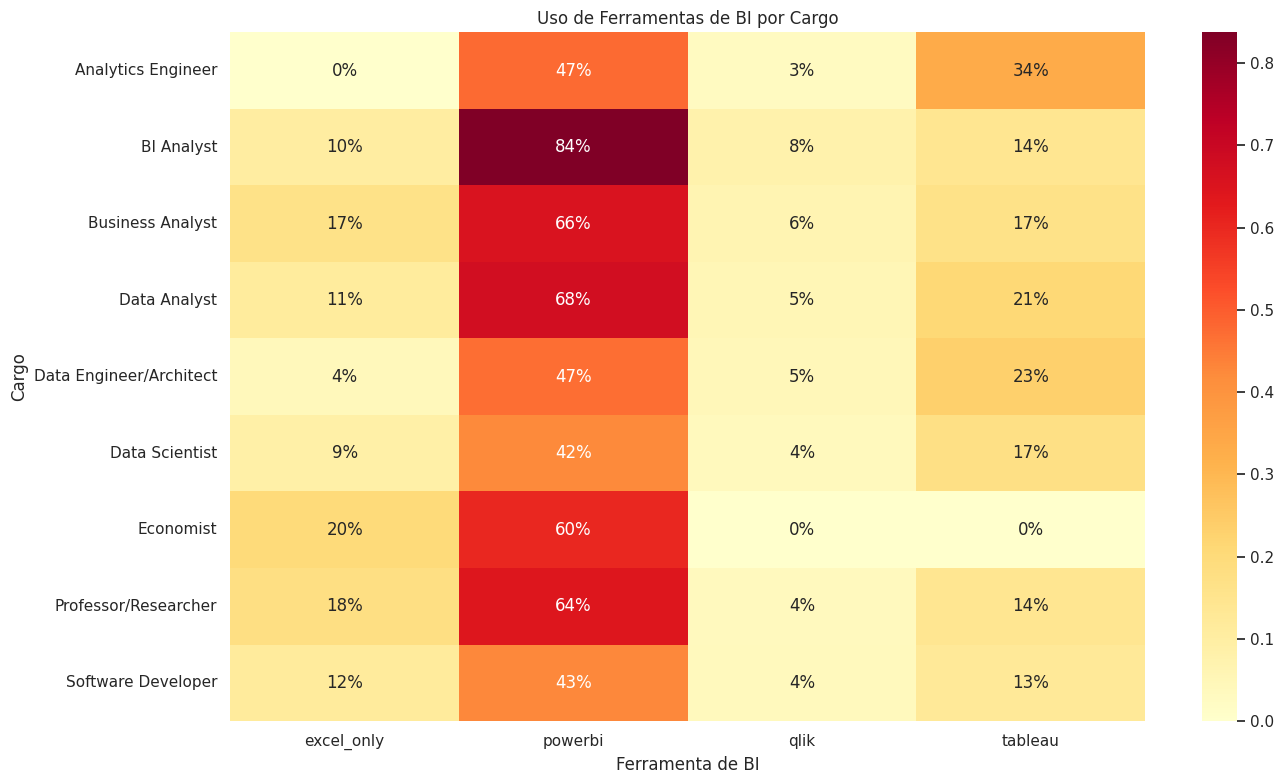

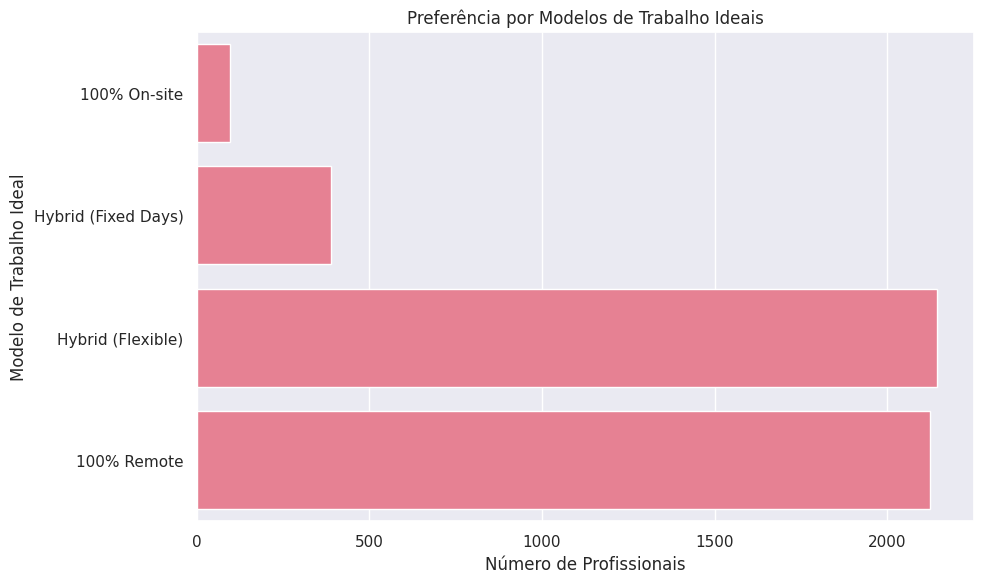

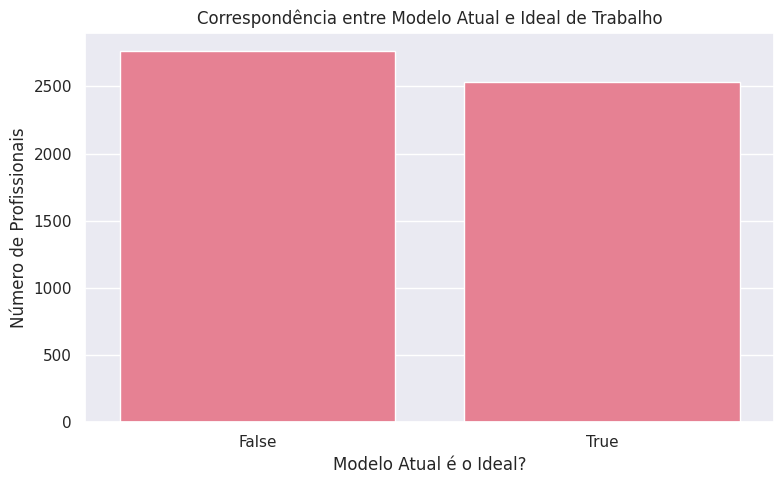


Análise concluída! O dataset processado foi salvo como 'processed_state_of_data_brazil_2023.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Set up visualization style
sns.set_theme(style="darkgrid")
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

# Currency formatter
def reais_formatter(x, pos):
    return f'R$ {x:,.0f}'

reais_format = FuncFormatter(reais_formatter)



# 25. Análise de formação acadêmica
plt.figure(figsize=(14, 8))
field_order = df['education_field'].value_counts().index
sns.countplot(data=df, y='education_field', order=field_order)
plt.title('Distribuição por Área de Formação Acadêmica')
plt.xlabel('Número de Profissionais')
plt.ylabel('Área de Formação')
plt.tight_layout()
plt.show()

# 26. Salário por área de formação
plt.figure(figsize=(14, 8))
top_fields = df['education_field'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['education_field'].isin(top_fields)],
            x='salary_midpoint', y='education_field',
            order=top_fields)
plt.title('Distribuição de Salários por Área de Formação (Top 10)')
plt.xlabel('Salário Mensal (R$)')
plt.ylabel('Área de Formação')
plt.gca().xaxis.set_major_formatter(reais_format)
plt.tight_layout()
plt.show()





# 30. Análise de satisfação no trabalho
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job_satisfaction')
plt.title('Distribuição de Satisfação no Trabalho (1-10)')
plt.xlabel('Nível de Satisfação')
plt.ylabel('Número de Profissionais')
plt.tight_layout()
plt.show()

# 31. Satisfação no trabalho por faixa salarial
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='job_satisfaction', y='salary_midpoint')
plt.title('Satisfação no Trabalho por Faixa Salarial')
plt.xlabel('Nível de Satisfação (1-10)')
plt.ylabel('Salário Mensal (R$)')
plt.gca().yaxis.set_major_formatter(reais_format)
plt.tight_layout()
plt.show()

# 32. Análise de deficiência (PCD)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='disability')
plt.title('Distribuição por Status de Deficiência (PCD)')
plt.xlabel('Status de Deficiência')
plt.ylabel('Número de Profissionais')
plt.tight_layout()
plt.show()

# 33. Salário por status de deficiência
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='disability', y='salary_midpoint', order=['No', 'Yes', 'Not Informed'])
plt.title('Distribuição de Salários por Status de Deficiência')
plt.xlabel('Status de Deficiência')
plt.ylabel('Salário Mensal (R$)')
plt.gca().yaxis.set_major_formatter(reais_format)
plt.tight_layout()
plt.show()

# 34. Uso de ferramentas de BI por cargo
plt.figure(figsize=(14, 8))
bi_tools = ['uses_powerbi', 'uses_qlik', 'uses_tableau', 'uses_excel_only']
melted_bi_role = df.melt(id_vars=['current_role'], value_vars=bi_tools,
                        var_name='bi_tool', value_name='uses_bi')
melted_bi_role['bi_tool'] = melted_bi_role['bi_tool'].str.replace('uses_', '')
bi_role_usage = melted_bi_role.groupby(['current_role', 'bi_tool'])['uses_bi'].mean().reset_index()
bi_role_usage = bi_role_usage.pivot(index='current_role', columns='bi_tool', values='uses_bi')

sns.heatmap(bi_role_usage, annot=True, fmt='.0%', cmap='YlOrRd')
plt.title('Uso de Ferramentas de BI por Cargo')
plt.xlabel('Ferramenta de BI')
plt.ylabel('Cargo')
plt.tight_layout()
plt.show()

# 35. Análise de modelos de trabalho ideais
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='ideal_work_model',
             order=['100% On-site', 'Hybrid (Fixed Days)', 'Hybrid (Flexible)', '100% Remote'])
plt.title('Preferência por Modelos de Trabalho Ideais')
plt.xlabel('Número de Profissionais')
plt.ylabel('Modelo de Trabalho Ideal')
plt.tight_layout()
plt.show()

# 36. Diferença entre modelo atual e ideal de trabalho
df['work_model_match'] = df['work_model'] == df['ideal_work_model']
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='work_model_match')
plt.title('Correspondência entre Modelo Atual e Ideal de Trabalho')
plt.xlabel('Modelo Atual é o Ideal?')
plt.ylabel('Número de Profissionais')
plt.tight_layout()
plt.show()


# Salvar o dataframe processado para uso futuro
df.to_csv('processed_state_of_data_brazil_2023.csv', index=False)

print("\nAnálise concluída! O dataset processado foi salvo como 'processed_state_of_data_brazil_2023.csv'")

<ipython-input-6-6583429b0fc4>:83: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


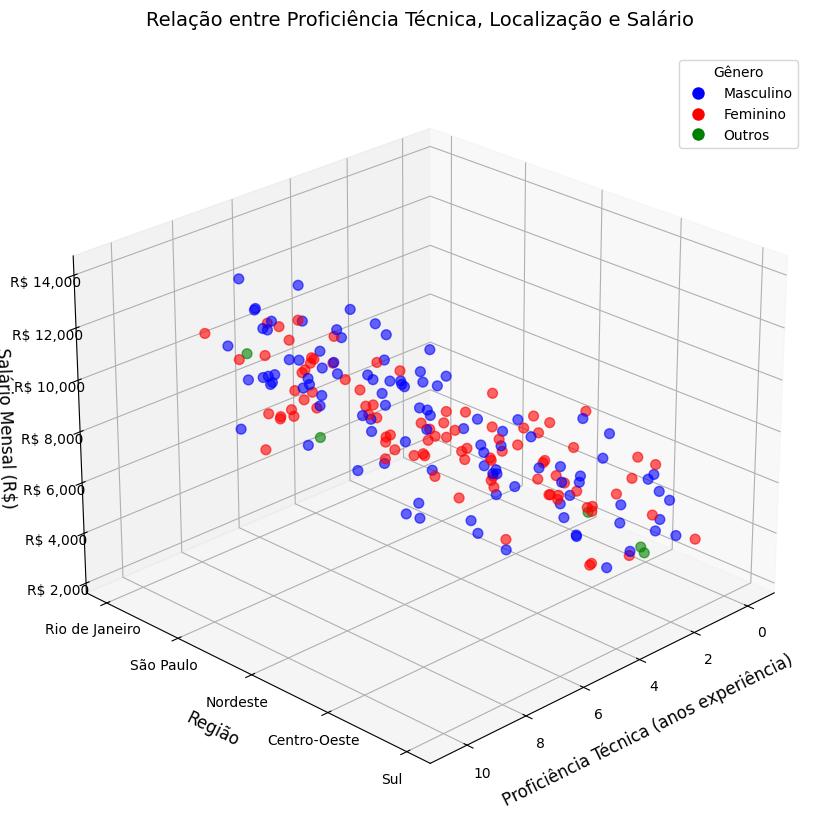

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Configurações iniciais
sns.set_palette("husl")

# Dados de exemplo (substitua pelos seus dados reais)
# Vamos criar alguns dados fictícios para demonstração
np.random.seed(42)
n = 200

# Gerando dados fictícios
proficiencia = np.random.normal(5, 2, n)  # Eixo X: Proficiência técnica (0-10)
regioes = np.random.choice(['São Paulo', 'Rio de Janeiro', 'Nordeste', 'Sul', 'Centro-Oeste'], n)  # Eixo Y: Regiões
salario = 3000 + proficiencia * 1000 + np.random.normal(0, 1500, n)  # Eixo Z: Salário
genero = np.random.choice(['Masculino', 'Feminino', 'Outros'], n, p=[0.5, 0.45, 0.05])
raca = np.random.choice(['Branco', 'Negro', 'Pardo', 'Outros'], n, p=[0.4, 0.3, 0.25, 0.05])

# Criando um DataFrame com os dados
df_3d = pd.DataFrame({
    'Proficiência': proficiencia,
    'Região': regioes,
    'Salário': salario,
    'Gênero': genero,
    'Raça': raca
})

# Mapeando regiões para valores numéricos para o eixo Y
regiao_map = {regiao: i for i, regiao in enumerate(df_3d['Região'].unique())}
df_3d['Região_num'] = df_3d['Região'].map(regiao_map)

# Criando o gráfico 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Usando cores para representar gênero
colors = {'Masculino': 'blue', 'Feminino': 'red', 'Outros': 'green'}
df_3d['color'] = df_3d['Gênero'].map(colors)

# Plotando os pontos
scatter = ax.scatter(
    df_3d['Proficiência'],
    df_3d['Região_num'],
    df_3d['Salário'],
    c=df_3d['color'],
    s=50,
    alpha=0.6,
    depthshade=True
)

# Configurando os eixos
ax.set_xlabel('Proficiência Técnica (anos experiência)', fontsize=12, labelpad=10)
ax.set_ylabel('Região', fontsize=12, labelpad=10)
ax.set_zlabel('Salário Mensal (R$)', fontsize=12, labelpad=10)

# Ajustando os ticks do eixo Y
ax.set_yticks(list(regiao_map.values()))
ax.set_yticklabels(list(regiao_map.keys()))

# Adicionando título
ax.set_title('Relação entre Proficiência Técnica, Localização e Salário', fontsize=14, pad=20)

# Adicionando legenda para gênero
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Masculino',
                              markerfacecolor='blue', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Feminino',
                              markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Outros',
                              markerfacecolor='green', markersize=10)]
ax.legend(handles=legend_elements, title='Gênero')

# Formatar eixo Z para mostrar valores em R$
def format_func(value, tick_number):
    return f"R$ {int(value):,}"

ax.zaxis.set_major_formatter(plt.FuncFormatter(format_func))

# Melhorar o ângulo de visualização
ax.view_init(elev=25, azim=45)

plt.tight_layout()
plt.show()

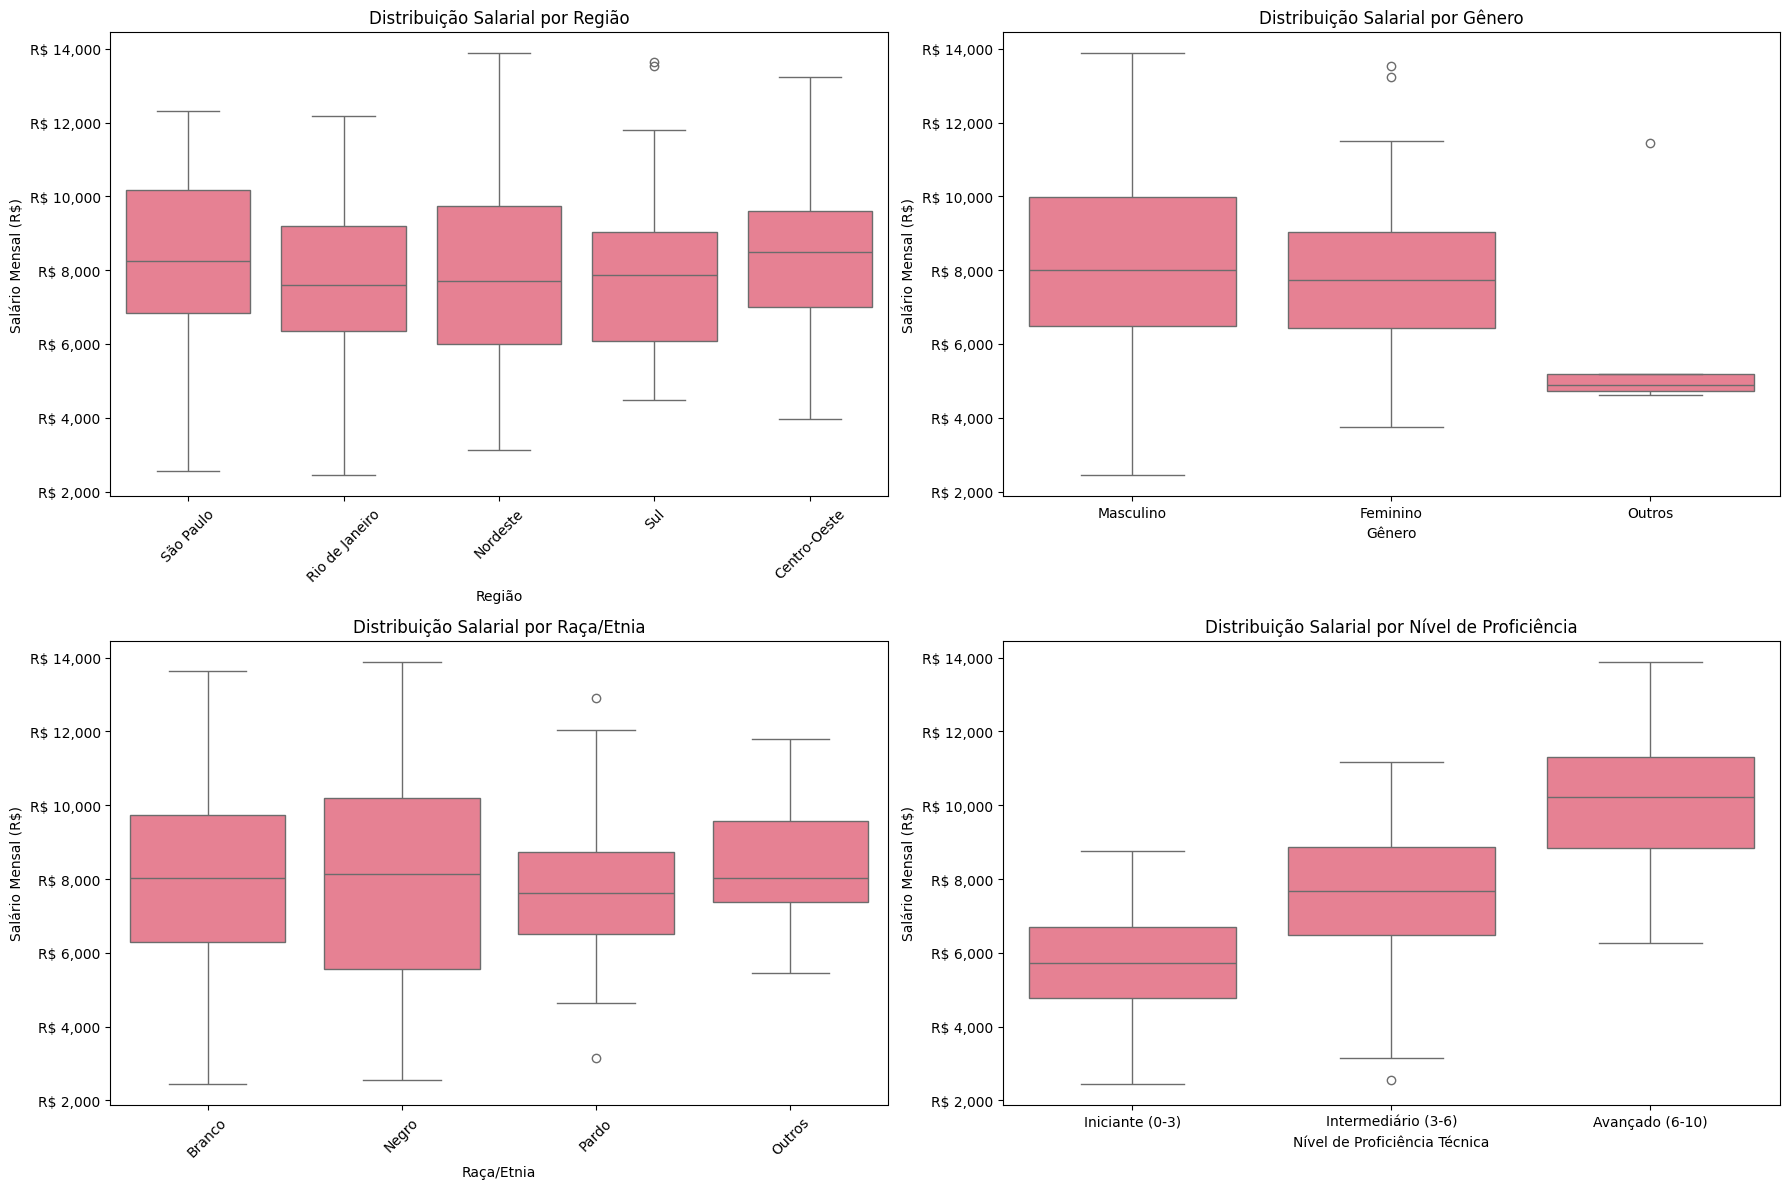

In [ ]:
# Criando subplots para múltiplos boxplots
plt.figure(figsize=(18, 12))

# Boxplot 1: Salário por Região
plt.subplot(2, 2, 1)
sns.boxplot(data=df_3d, x='Região', y='Salário', order=['São Paulo', 'Rio de Janeiro', 'Nordeste', 'Sul', 'Centro-Oeste'])
plt.title('Distribuição Salarial por Região', fontsize=12)
plt.xlabel('Região', fontsize=10)
plt.ylabel('Salário Mensal (R$)', fontsize=10)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_func))

# Boxplot 2: Salário por Gênero
plt.subplot(2, 2, 2)
sns.boxplot(data=df_3d, x='Gênero', y='Salário', order=['Masculino', 'Feminino', 'Outros'])
plt.title('Distribuição Salarial por Gênero', fontsize=12)
plt.xlabel('Gênero', fontsize=10)
plt.ylabel('Salário Mensal (R$)', fontsize=10)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_func))

# Boxplot 3: Salário por Raça
plt.subplot(2, 2, 3)
sns.boxplot(data=df_3d, x='Raça', y='Salário', order=['Branco', 'Negro', 'Pardo', 'Outros'])
plt.title('Distribuição Salarial por Raça/Etnia', fontsize=12)
plt.xlabel('Raça/Etnia', fontsize=10)
plt.ylabel('Salário Mensal (R$)', fontsize=10)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_func))

# Boxplot 4: Salário por Proficiência (agrupada)
# Primeiro, vamos categorizar a proficiência
df_3d['Nível Proficiência'] = pd.cut(df_3d['Proficiência'],
                                    bins=[0, 3, 6, 10],
                                    labels=['Iniciante (0-3)', 'Intermediário (3-6)', 'Avançado (6-10)'])

plt.subplot(2, 2, 4)
sns.boxplot(data=df_3d, x='Nível Proficiência', y='Salário')
plt.title('Distribuição Salarial por Nível de Proficiência', fontsize=12)
plt.xlabel('Nível de Proficiência Técnica', fontsize=10)
plt.ylabel('Salário Mensal (R$)', fontsize=10)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_func))

plt.tight_layout()
plt.show()